In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyjstat import pyjstat #for reading json-stat format
import requests
from collections import OrderedDict

from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

pd.options.display.max_rows = 999
pd.options.display.max_columns = 50

%matplotlib inline


In [11]:
#plot parameters
plt.rcParams["figure.figsize"] = [20,15]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 12

#### Create Chloropleth (filled map)

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


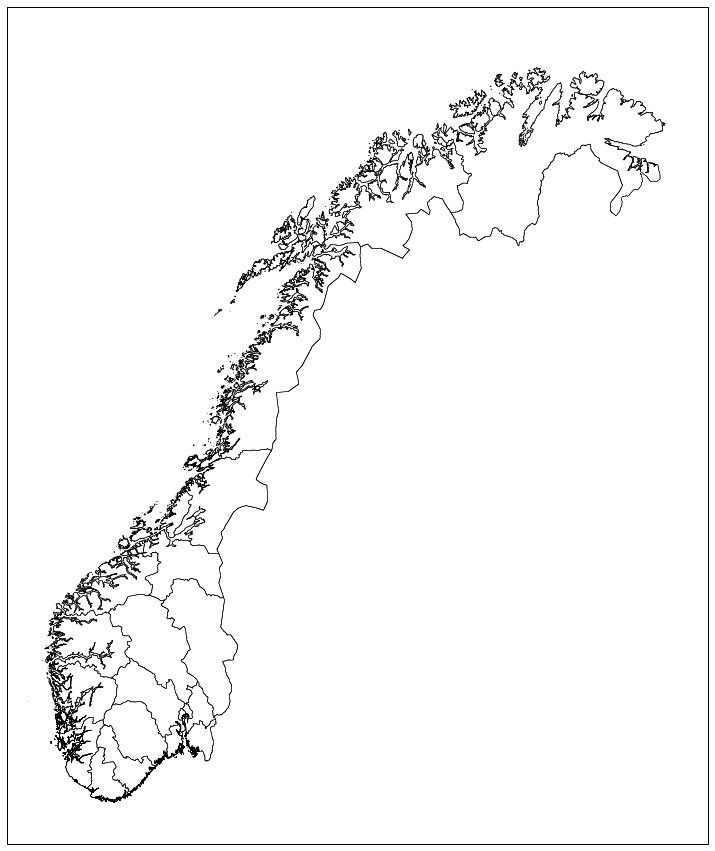

In [18]:
ax=fig.add_axes([0.1,0.1,.9,.9])
# setup mercator map projection.
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
			urcrnrlon=33.,urcrnrlat=72.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',projection='merc',)
            #lat_0=40.,lon_0=-20.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")
county_names = []
for shape_dict in m.counties_info:
	county_names.append(shape_dict['NAME_1'])
#m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm2', "Municipalities")

ax = plt.gca() # get current axes instance
#get hordaland and draw
seg = m.counties[county_names.index('Finnmark')]
poly = Polygon(seg, facecolor='red', edgecolor='red')
ax.add_patch(poly)
plt.show()


create chloropleth
http://ramiro.org/notebook/basemap-choropleth/

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


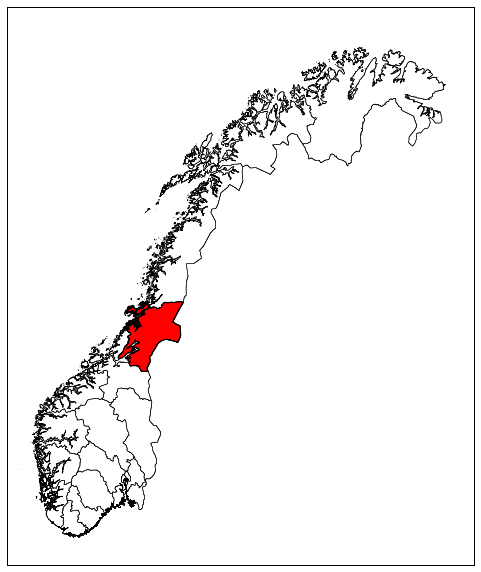

In [3]:
#based on http://ramiro.org/notebook/basemap-choropleth/

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)
# setup mercator map projection.
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
			urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

for info, shape in zip(m.counties_info, m.counties):
	if info['NAME_1']=='Nord-Trøndelag':
	  color = 'red'
	  patches = [Polygon(np.array(shape), True)]
	  pc = PatchCollection(patches)
	  pc.set_facecolor(color)
	  ax.add_collection(pc)
plt.show()
        

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


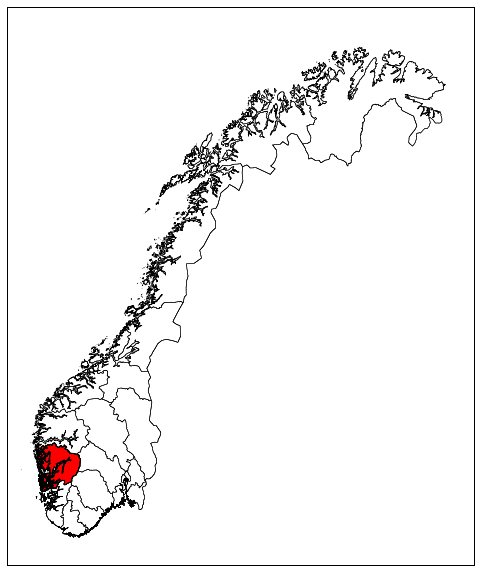

In [4]:

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)
# setup mercator map projection.
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
			urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

df = pd.DataFrame()
shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
	#create pandas dataframe with shape file info
	shapes.append(shape)
	names.append(info["NAME_1"])

for name, shape in zip(names, shapes):
	if name == "Hordaland":
		color = 'red'
		patches = [Polygon(np.array(shape), True)]
		pc = PatchCollection(patches)
		pc.set_facecolor(color)
		ax.add_collection(pc)       
plt.show()

In [11]:
#import data on housing prices by county
house_prices = pd.read_csv("https://data.ssb.no/api/v0/dataset/25138.csv?lang=no", sep=";")
house_prices.columns = ["region", "type", "year", "variable", "price_sq_m"]

house_prices = house_prices[house_prices.type=="02 Brukte eneboliger"]
house_prices = house_prices[house_prices.variable == "Kvadratmeterpris (kr)"]
house_prices = house_prices[house_prices.year==2014]

fylke = house_prices.region.values

fylke2 = ["Østfold", "Akershus", "Oslo", "Hedmark",
 "Oppland", "Buskerud", "Vestvold", "Telemark", "Aust-Agder",
  "Vest-Agder", "Rogaland", "Hordaland", "Sogn og Fjordane", 
  "Møre og Romsdal", "Sør-Trøndelag", "Nord-Trøndelag", "Nordland", 
  "Troms", "Finnmark"] 
fylke_dict = dict(zip(fylke, fylke2))

house_prices["counties"] = [fylke_dict[county] for county in house_prices.region]
del house_prices["region"]


['price_sq_m', 'counties']

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


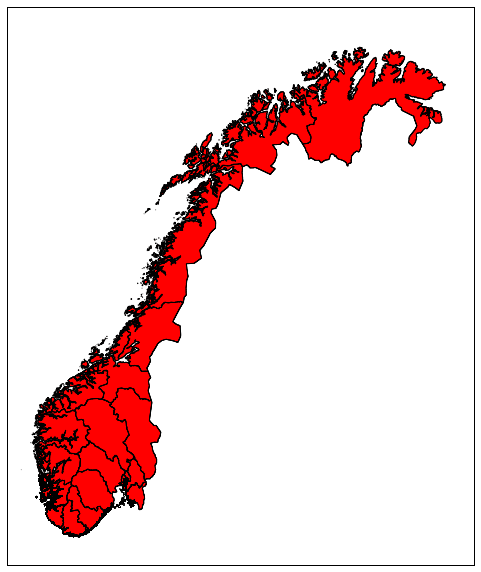

In [5]:

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
  shapes.append(shape)
  names.append(info["NAME_1"])

names_series = pd.Series(names)
names_series = names_series[~names_series.duplicated()]

names_series2 = ["Østfold"]
for f in names_series[1:]:
  names_series2.append(f)

shape_fylke_dict2 = dict(zip(names_series, names_series2))

#now create dataframe with shapefiles and names
df_shape = pd.DataFrame()
df_shape["counties"] = [shape_fylke_dict2[name] for name in names]
df_shape["shapes"] = shapes

df_shape = df_shape.merge(house_prices[["price_sq_m", "counties"]], on="counties")




for shape, price in zip(df_shape.shapes, df_shape.price_sq_m):
		color = 'red'
		patches = [Polygon(np.array(shape), True)]
		pc = PatchCollection(patches)
		pc.set_facecolor(color)
		ax.add_collection(pc)       
plt.show()

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


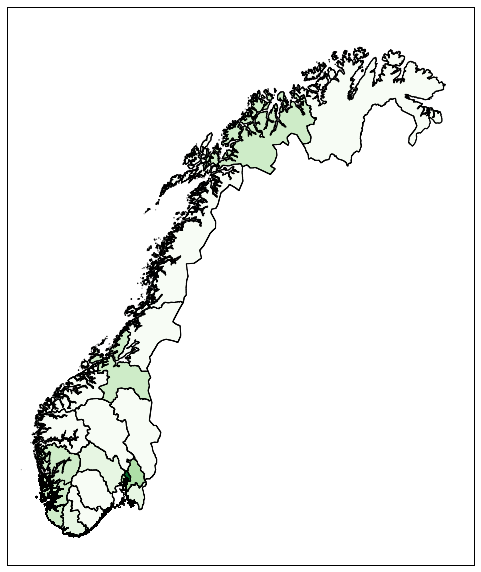

In [12]:
fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
  shapes.append(shape)
  names.append(info["NAME_1"])

names_series = pd.Series(names)
names_series = names_series[~names_series.duplicated()]

names_series2 = ["Østfold"]
for f in names_series[1:]:
  names_series2.append(f)

shape_fylke_dict2 = dict(zip(names_series, names_series2))

#now create dataframe with shapefiles and names
df_shape = pd.DataFrame()
df_shape["counties"] = [shape_fylke_dict2[name] for name in names]
df_shape["shapes"] = shapes

df_shape = df_shape.merge(house_prices[["price_sq_m", "counties"]], on="counties")
df_shape["price_sq_m"] = df_shape["price_sq_m"].astype(float)
#create different colors
num_colors = 9
values = df_shape["price_sq_m"]
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df_shape['bin'] = np.digitize(values, bins) - 1
#df.sort('bin', ascending=False).head(10)

def add_polys(shape_row):
  color = scheme[shape_row.bin]
  patches = [Polygon(np.array(shape_row.shapes), True)]
  pc = PatchCollection(patches)
  pc.set_facecolor(color)
  ax.add_collection(pc) 

df_shape.apply(add_polys, axis=1)

plt.show()

### Now add municipalities

Look at growth of municipalities

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


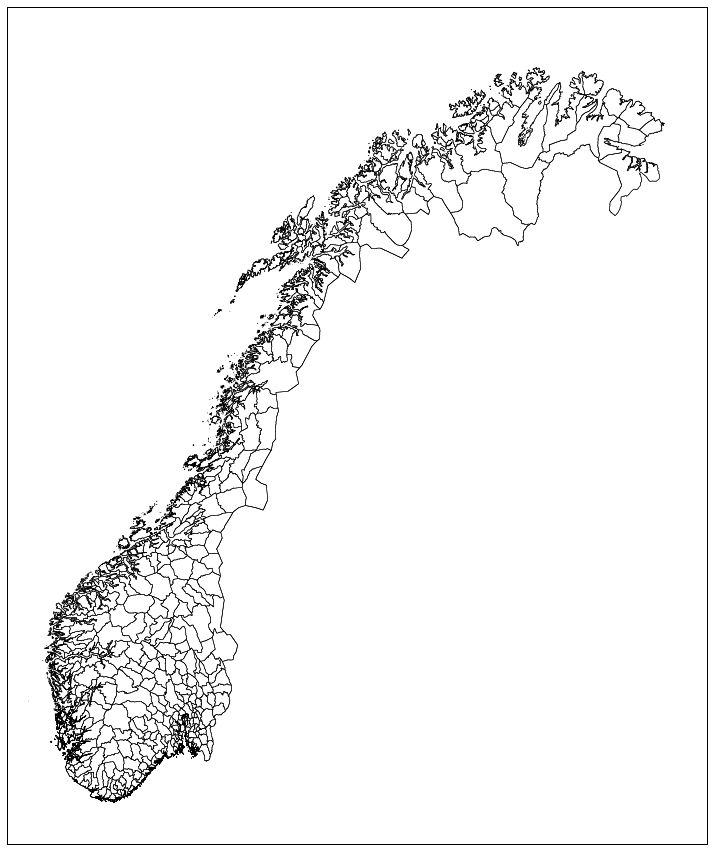

In [4]:
fig=plt.figure()
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm2', "princ")

#m.readshapefile('norway_shape/kartverket/kommuner/kommuner', "princ", drawbounds=False)
plt.show()

In [5]:
res_url = "https://data.ssb.no/api/v0/dataset/1106.json?lang=no"
data = requests.get(res_url)
res_data = pyjstat.from_json_stat(data.json(object_pairs_hook=OrderedDict))


In [6]:
new_res = res_data[0]
new_res.columns = ["princ", "variable", "quarter", "value"]
folkevekst = new_res[new_res.variable=="Folkevekst"]
folkevekst15 = folkevekst[folkevekst.quarter == "2015K3"]
folketall = new_res[new_res.variable =="Folketalet ved utgangen av kvartalet"]
folketall15 = folketall[folketall.quarter =="2015K3"]
folkevekst15 = folkevekst15.merge(folketall15[["princ", "value"]], on="princ")
folkevekst15.columns = ["princ", "variable", "quarter", "folkevekst", "folketall"]
folkevekst15["folkevekst_perc"] = 100* folkevekst15.folkevekst/folkevekst15.folketall


In [7]:

#get kommune num to match with shape data
ssb_kommune = pd.read_csv("ssb_kommune.csv")
del ssb_kommune["Unnamed: 0"]
ssb_kommune.columns =["kode", "princ"]

folkevekst15 = folkevekst15.merge(ssb_kommune, on="princ", how="left")


/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


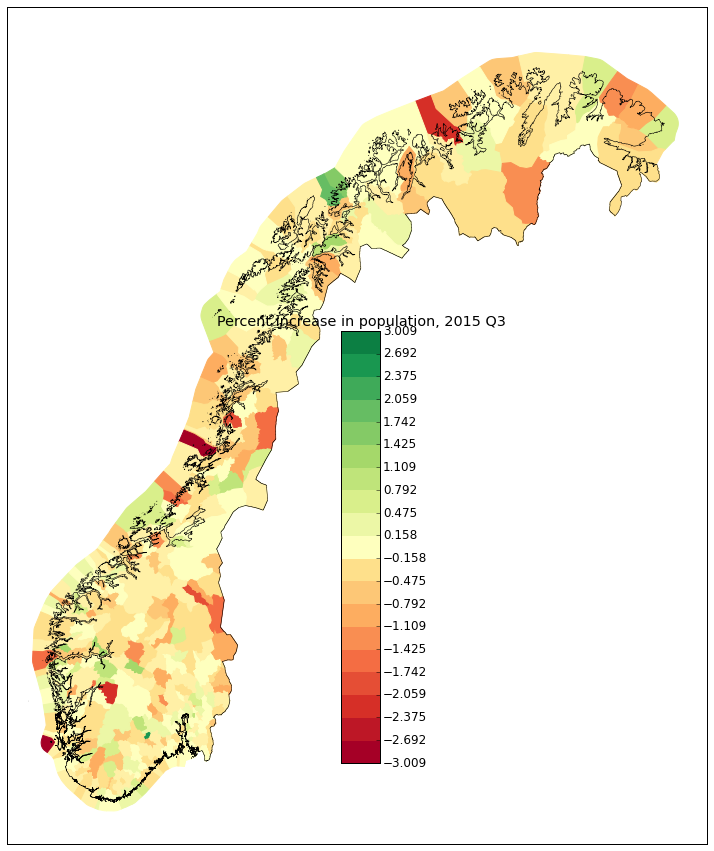

In [16]:
fig=plt.figure(figsize=(18,15))
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/kartverket/kommuner/kommuner', "princ", drawbounds=False)

shapes=[]
kode = []
names = []
for info, shape in zip(m.princ_info, m.princ):
  shapes.append(shape)
  kode.append(info["komm"])
  names.append(info["navn"])

df_folkevekst15 = pd.DataFrame()
df_folkevekst15["shapes"] = shapes
df_folkevekst15["kode"] = kode

#merge with ssb data
df_folkevekst15 = df_folkevekst15.merge(folkevekst15, on="kode", how="left")

#create different colors for map
num_colors = 20
values = df_folkevekst15["folkevekst_perc"].astype(float)
cm = plt.get_cmap('RdYlGn')
scheme = [cm(i / num_colors) for i in range(num_colors)]
absmax = np.max([abs(values.min()), values.max()])
bins = np.linspace(-absmax, absmax, num_colors)
df_folkevekst15['bin'] = np.digitize(values, bins) - 1
df_folkevekst15.sort_values('bin', ascending=False).head(10)

def add_polys(shape_row):
  color = scheme[shape_row.bin]
  patches = [Polygon(np.array(shape_row.shapes), True)]
  pc = PatchCollection(patches)
  pc.set_facecolor(color)
  pc.set_edgecolor(color)
  ax.add_collection(pc) 

df_folkevekst15.apply(add_polys, axis=1)

# Draw color legend.
#left, bottom, width, height
ax_legend = fig.add_axes([0.50, 0.20, 0.03, 0.4], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='vertical')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
cb.ax.set_title("Percent increase in population, 2015 Q3")

plt.show()